In [158]:
import time
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

8040
[(0, 0, -999.0), (1, 0, -999.0), (2, 0, -999.0), (3, 0, -999.0), (4, 0, -999.0), (5, 0, -999.0), (6, 0, -999.0), (7, 0, -999.0), (8, 0, -999.0), (9, 0, -999.0), (10, 0, -999.0), (11, 0, -999.0), (12, 0, -999.0), (13, 0, -999.0), (14, 0, -999.0), (15, 0, -999.0), (16, 0, -999.0), (17, 0, -999.0), (18, 0, -999.0), (19, 0, -999.0), (20, 0, -999.0), (21, 0, -999.0), (22, 0, -999.0), (23, 0, -999.0), (24, 0, -999.0), (25, 0, -999.0), (26, 0, -999.0), (27, 0, -999.0), (28, 0, -999.0), (29, 0, -999.0), (30, 0, -999.0), (31, 0, -999.0), (32, 0, -999.0), (33, 0, -999.0), (34, 0, -999.0), (35, 0, -999.0), (36, 0, -999.0), (37, 0, -999.0), (38, 0, -999.0), (39, 0, -999.0), (40, 0, -999.0), (41, 0, -999.0), (42, 0, -999.0), (43, 0, -999.0), (44, 0, -999.0), (45, 0, -999.0), (46, 0, -999.0), (47, 0, -999.0), (48, 0, -999.0), (49, 0, -999.0), (50, 0, -999.0), (51, 0, -999.0), (52, 0, -999.0), (53, 0, -999.0), (54, 0, -999.0), (55, 0, -999.0), (56, 0, -999.0), (57, 0, -999.0), (58, 0, -999.0), (

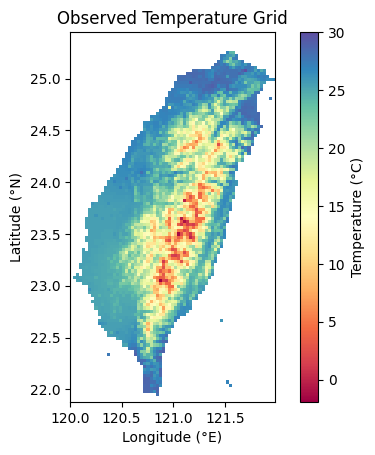

In [159]:
temperatures = []
loc_tem = []
with open('O-A0038-003.xml', 'r') as f:
    xml_content = f.read()
#print(xml_content[xml_content.index('<Content>') + len('<Content>'):xml_content.index('</Content>')])  # Print the first 500 characters of the XML file
data = xml_content[xml_content.index('<Content>') + len('<Content>'):xml_content.index('</Content>')]
# Split the data by lines, then split each line by comma
lines = data.split('\n')
split_lines = [line.split(',') for line in lines if line.strip() != '']

for line in split_lines:
    for tem in line:
        temperatures.append(tem)

print(len(temperatures))  # Print the first 5 temperature values
for i in range(120):
    for j in range(67):
        loc_tem.append((j, i, float(temperatures[j + i*67])))

print(loc_tem)  # Print the shape of the temperature array

# Create a 2D temperature grid (latitude x longitude)
temp_grid = np.zeros((120, 67))
for j, i, temp in loc_tem:
    if temp==-999:
        temp = np.nan  # Handle missing data
    temp_grid[i, j] = temp


# Geographic parameters
lon_min, lat_min = 120.00, 21.88
lon_res = lat_res = 0.03
lon_max = lon_min + lon_res * (temp_grid.shape[1] - 1)
lat_max = lat_min + lat_res * (temp_grid.shape[0] - 1)
extent = [lon_min, lon_max, lat_min, lat_max]

plt.imshow(temp_grid, cmap='Spectral', interpolation='nearest', origin='lower', extent=extent)
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('Observed Temperature Grid')
plt.show()

1. 分類 (Classification) 資料集. 
- 格式：(精度, 緯度, label)
- 規則：
若溫度觀測值為 無效值 -999，則 label = 0。
若溫度觀測值為 有效值，則 label = 1。


In [160]:
# Build classification dataset using (longitude, latitude) as features
cls_features = []
cls_labels = []

for lon_idx, lat_idx, temp in loc_tem:
    cls_features.append([lon_idx, lat_idx])
    cls_labels.append(0 if temp == -999 else 1)

X_cls = np.array(cls_features, dtype=np.float32)
y_cls = np.array(cls_labels, dtype=np.int64)

print(f"Feature matrix shape: {X_cls.shape}")
print(f"Label vector shape: {y_cls.shape}")

unique, counts = np.unique(y_cls, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Class distribution: {class_distribution}")

Feature matrix shape: (8040, 2)
Label vector shape: (8040,)
Class distribution: {0: 4545, 1: 3495}


In [161]:
device = torch.device("mps" if torch.backends.mps.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: mps


ClassificationNet(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
)

Total parameters: 10753
Epoch   1/200 - Loss: 0.6349 - Test Accuracy: 0.6368
Epoch  20/200 - Loss: 0.1248 - Test Accuracy: 0.9739
Epoch  40/200 - Loss: 0.1033 - Test Accuracy: 0.9770
Epoch  60/200 - Loss: 0.0992 - Test Accuracy: 0.9764
Epoch  80/200 - Loss: 0.0899 - Test Accuracy: 0.9801
Epoch 100/200 - Loss: 0.0832 - Test Accuracy: 0.9807
Epoch 120/200 - Loss: 0.0787 - Test Accuracy: 0.9807
Epoch 140/200 - Loss: 0.0766 - Test Accuracy: 0.9807
Epoch 160/200 - Loss: 0.0737 - Test Accuracy: 0.9845
Epoch 180/200 - Loss: 0.0744 - Test Accuracy:

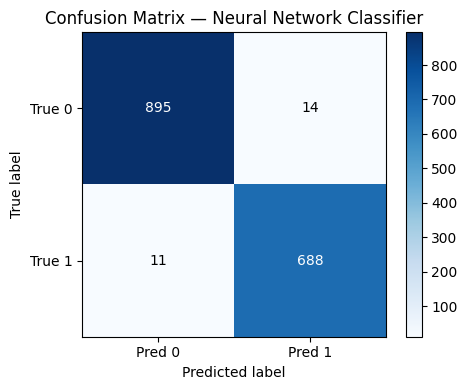

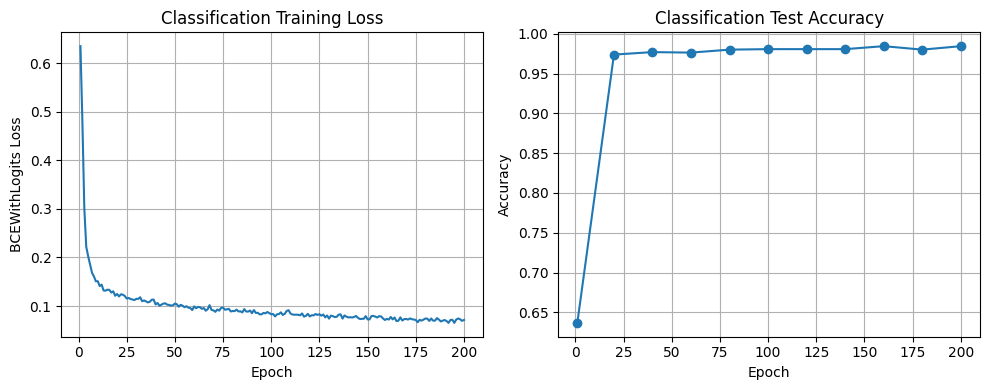

In [162]:
# Neural network classifier using (longitude, latitude) features
from sklearn.preprocessing import StandardScaler

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(
    X_cls,
    y_cls,
    test_size=0.2,
    random_state=42,
    stratify=y_cls,
 )

scaler_cls = StandardScaler()
X_cls_train_scaled = scaler_cls.fit_transform(X_cls_train)
X_cls_test_scaled = scaler_cls.transform(X_cls_test)

X_cls_train_tensor = torch.tensor(X_cls_train_scaled, dtype=torch.float32).to(device)
y_cls_train_tensor = torch.tensor(y_cls_train.reshape(-1, 1), dtype=torch.float32).to(device)
X_cls_test_tensor = torch.tensor(X_cls_test_scaled, dtype=torch.float32).to(device)
y_cls_test_tensor = torch.tensor(y_cls_test.reshape(-1, 1), dtype=torch.float32).to(device)

train_cls_dataset = TensorDataset(X_cls_train_tensor, y_cls_train_tensor)
train_cls_loader = DataLoader(train_cls_dataset, batch_size=256, shuffle=True)

class ClassificationNet(nn.Module):
    def __init__(self, input_dim=2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 1)

        )

    def forward(self, x):
        return self.model(x)

cls_model = ClassificationNet().to(device)
print(cls_model)
cls_total_params = sum(p.numel() for p in cls_model.parameters())
print(f"\nTotal parameters: {cls_total_params}")

cls_criterion = nn.BCEWithLogitsLoss()
cls_optimizer = optim.Adam(cls_model.parameters(), lr=1e-3)

cls_train_losses = []
cls_eval_accuracies = []
cls_epochs = 200

for epoch in range(1, cls_epochs + 1):
    cls_model.train()
    epoch_loss = 0.0
    for batch_x, batch_y in train_cls_loader:
        logits = cls_model(batch_x).squeeze(1)
        loss = cls_criterion(logits, batch_y.squeeze(1))

        cls_optimizer.zero_grad()
        loss.backward()
        cls_optimizer.step()

        epoch_loss += loss.item() * batch_x.size(0)

    epoch_loss /= len(train_cls_dataset)
    cls_train_losses.append(epoch_loss)

    if epoch % 20 == 0 or epoch == 1:
        cls_model.eval()
        with torch.no_grad():
            test_logits = cls_model(X_cls_test_tensor).squeeze(1)
            test_probs = torch.sigmoid(test_logits)
            test_preds = (test_probs >= 0.5).float()
            accuracy = (test_preds.unsqueeze(1) == y_cls_test_tensor).float().mean().item()
            cls_eval_accuracies.append((epoch, accuracy))
        print(f"Epoch {epoch:3d}/{cls_epochs} - Loss: {epoch_loss:.4f} - Test Accuracy: {accuracy:.4f}")

cls_model.eval()
with torch.no_grad():
    final_logits = cls_model(X_cls_test_tensor).squeeze(1)
    y_cls_prob = torch.sigmoid(final_logits).cpu().numpy()
    y_cls_pred = (y_cls_prob >= 0.5).astype(int)

cls_accuracy = accuracy_score(y_cls_test, y_cls_pred)
cls_report = classification_report(y_cls_test, y_cls_pred, target_names=['Invalid', 'Valid'])
cls_cm = confusion_matrix(y_cls_test, y_cls_pred)

print(f"\nFinal classification accuracy: {cls_accuracy:.4f}")
print("\nClassification report:\n", cls_report)

plt.figure(figsize=(5, 4))
plt.imshow(cls_cm, cmap='Blues')
plt.title('Confusion Matrix — Neural Network Classifier')
plt.colorbar()
plt.xticks([0, 1], ['Pred 0', 'Pred 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

for (i, j), value in np.ndenumerate(cls_cm):
    plt.text(j, i, int(value), ha='center', va='center', color='white' if value > cls_cm.max() / 2 else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Plot training loss and evaluation accuracy history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, cls_epochs + 1), cls_train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('BCEWithLogits Loss')
plt.title('Classification Training Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
if cls_eval_accuracies:
    epochs_eval, acc_eval = zip(*cls_eval_accuracies)
    plt.plot(epochs_eval, acc_eval, marker='o', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Classification Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# compare with true labels


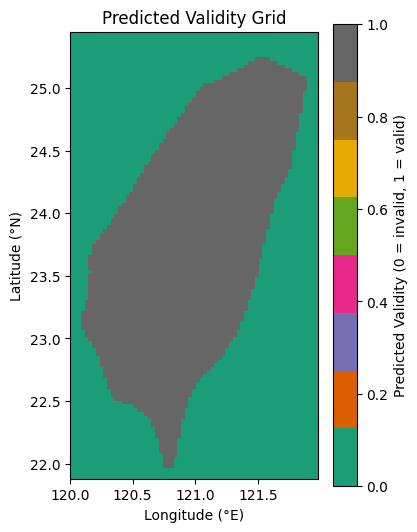

In [163]:
# Predict validity across the full coordinate grid using the trained classifier
cls_model.eval()
all_coords_cls = np.array([[lon, lat] for lat in range(120) for lon in range(67)], dtype=np.float32)
all_coords_cls_scaled = scaler_cls.transform(all_coords_cls)
all_coords_cls_tensor = torch.tensor(all_coords_cls_scaled, dtype=torch.float32).to(device)
with torch.no_grad():
    logits_grid = cls_model(all_coords_cls_tensor).squeeze(1).cpu().numpy()
    prob_grid = 1 / (1 + np.exp(-logits_grid))
    label_grid = (prob_grid >= 0.5).astype(int).reshape(120, 67)
    prob_grid = prob_grid.reshape(120, 67)

extent = [
    lon_min,
    lon_min + lon_res * (label_grid.shape[1] - 1),
    lat_min,
    lat_min + lat_res * (label_grid.shape[0] - 1),
]

plt.figure(figsize=(4, 6))
plt.imshow(label_grid, cmap='Dark2', interpolation='nearest', origin='lower', extent=extent)
plt.colorbar(label='Predicted Validity (0 = invalid, 1 = valid)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('Predicted Validity Grid')
plt.show()

2. 回歸 (Regression) 資料集
- 格式：(精度, 緯度, Value)
- 規則：
僅保留有效的溫度觀測值（剔除所有 -999.）。
value 為對應的攝氏溫度。

In [164]:
# Build regression dataset using only valid temperature observations
reg_features = []
reg_targets = []

for lon_idx, lat_idx, temp in loc_tem:
    if temp != -999:  # keep only valid temperature values
        reg_features.append([lon_idx, lat_idx])
        reg_targets.append(temp)

X_reg = np.array(reg_features, dtype=np.float32)
y_reg = np.array(reg_targets, dtype=np.float32)

print(f"Regression feature matrix shape: {X_reg.shape}")
print(f"Regression target vector shape: {y_reg.shape}")
print(f"Temperature range: {y_reg.min():.2f}°C to {y_reg.max():.2f}°C")

Regression feature matrix shape: (3495, 2)
Regression target vector shape: (3495,)
Temperature range: -1.90°C to 30.00°C


RegressionNet(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
)

Total parameters: 21057
Epoch   1/300 - Training MSE: 491.8906
Epoch  30/300 - Training MSE: 22.3194
Epoch  60/300 - Training MSE: 19.1903
Epoch  90/300 - Training MSE: 19.1747
Epoch 120/300 - Training MSE: 17.7360
Epoch 150/300 - Training MSE: 16.1762
Epoch 180/300 - Training MSE: 16.5016
Epoch 210/300 - Training MSE: 16.3545
Epoch 240/300 - Training MSE: 15.1329
Epoch 270/300 - Training MSE: 15.2353
Epoch 300/300 - Training MSE: 14.9397

Regression model evaluation:
  MSE : 12.0927
  RMSE: 3.4775
  MAE : 2.9589
  R^2 : 0.6435


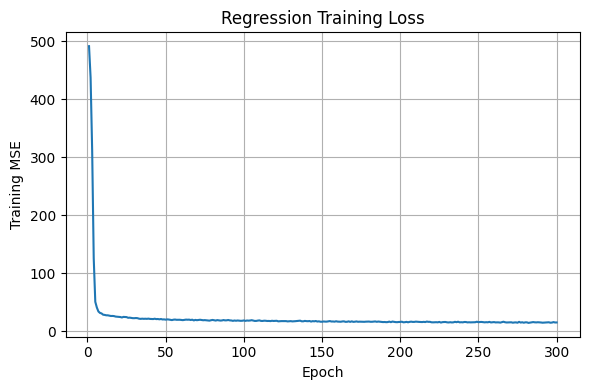

In [165]:
# Neural network regressor for valid temperature predictions
from sklearn.preprocessing import StandardScaler

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42,
 )

scaler_reg = StandardScaler()
X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_reg.transform(X_reg_test)

X_reg_train_tensor = torch.tensor(X_reg_train_scaled, dtype=torch.float32).to(device)
y_reg_train_tensor = torch.tensor(y_reg_train.reshape(-1, 1), dtype=torch.float32).to(device)
X_reg_test_tensor = torch.tensor(X_reg_test_scaled, dtype=torch.float32).to(device)
y_reg_test_tensor = torch.tensor(y_reg_test.reshape(-1, 1), dtype=torch.float32).to(device)

train_reg_dataset = TensorDataset(X_reg_train_tensor, y_reg_train_tensor)
train_reg_loader = DataLoader(train_reg_dataset, batch_size=256, shuffle=True)

class RegressionNet(nn.Module):
    def __init__(self, input_dim=2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        return self.model(x)

reg_model = RegressionNet().to(device)
print(reg_model)
reg_total_params = sum(p.numel() for p in reg_model.parameters())
print(f"\nTotal parameters: {reg_total_params}")

reg_criterion = nn.MSELoss()
reg_optimizer = optim.Adam(reg_model.parameters(), lr=1e-3)

reg_train_losses = []
reg_epochs = 300

for epoch in range(1, reg_epochs + 1):
    reg_model.train()
    epoch_loss = 0.0
    for batch_x, batch_y in train_reg_loader:
        preds = reg_model(batch_x).squeeze(1)
        loss = reg_criterion(preds, batch_y.squeeze(1))

        reg_optimizer.zero_grad()
        loss.backward()
        reg_optimizer.step()

        epoch_loss += loss.item() * batch_x.size(0)

    epoch_loss /= len(train_reg_dataset)
    reg_train_losses.append(epoch_loss)

    if epoch % 30 == 0 or epoch == 1:
        print(f"Epoch {epoch:3d}/{reg_epochs} - Training MSE: {epoch_loss:.4f}")

reg_model.eval()
with torch.no_grad():
    y_reg_pred_tensor = reg_model(X_reg_test_tensor).squeeze(1)
    y_reg_pred = y_reg_pred_tensor.cpu().numpy()

reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
reg_rmse = np.sqrt(reg_mse)
reg_mae = mean_absolute_error(y_reg_test, y_reg_pred)
reg_r2 = r2_score(y_reg_test, y_reg_pred)

print("\nRegression model evaluation:")
print(f"  MSE : {reg_mse:.4f}")
print(f"  RMSE: {reg_rmse:.4f}")
print(f"  MAE : {reg_mae:.4f}")
print(f"  R^2 : {reg_r2:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(range(1, reg_epochs + 1), reg_train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training MSE')
plt.title('Regression Training Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

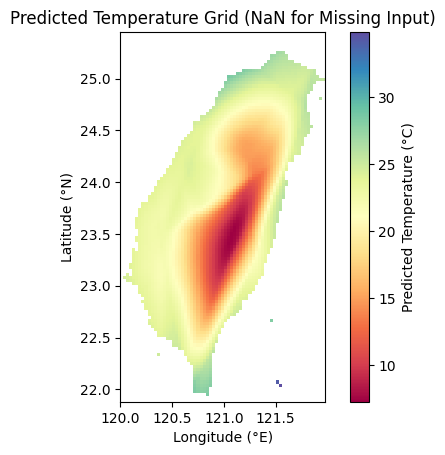

In [166]:
# Predict temperatures for the full coordinate grid and render the map
reg_model.eval()
all_coords = np.array([[lon, lat] for lat in range(120) for lon in range(67)], dtype=np.float32)
all_coords_scaled = scaler_reg.transform(all_coords)
all_coords_tensor = torch.tensor(all_coords_scaled, dtype=torch.float32).to(device)
with torch.no_grad():
    predicted_grid = reg_model(all_coords_tensor).cpu().numpy().reshape(120, 67)

predicted_grid_masked = predicted_grid.copy()
if 'temp_grid' in globals():
    predicted_grid_masked[np.isnan(temp_grid)] = np.nan

extent = [
    lon_min,
    lon_min + lon_res * (predicted_grid_masked.shape[1] - 1),
    lat_min,
    lat_min + lat_res * (predicted_grid_masked.shape[0] - 1),
]

plt.imshow(predicted_grid_masked, cmap='Spectral', interpolation='nearest', origin='lower', extent=extent)
plt.colorbar(label='Predicted Temperature (°C)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('Predicted Temperature Grid (NaN for Missing Input)')
plt.show()

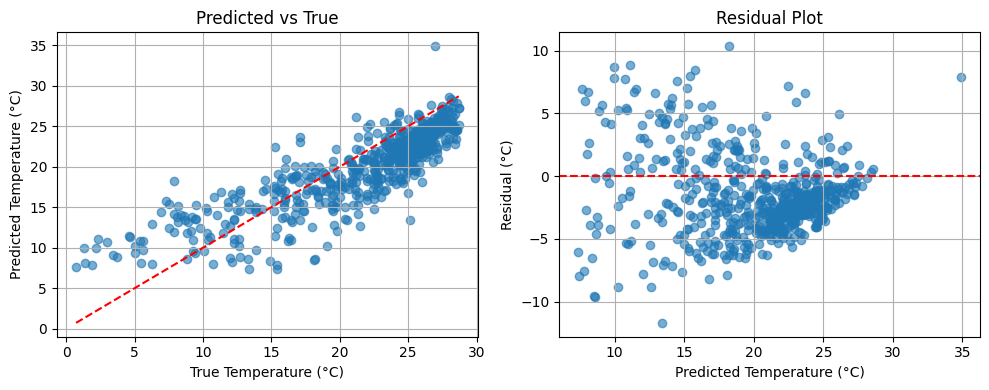

In [167]:
# Visualize regression performance
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_reg_test, y_reg_pred, alpha=0.6)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.xlabel('True Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Predicted vs True')
plt.grid(True)

plt.subplot(1, 2, 2)
residuals = y_reg_pred - y_reg_test
plt.scatter(y_reg_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Temperature (°C)')
plt.ylabel('Residual (°C)')
plt.title('Residual Plot')
plt.grid(True)

plt.tight_layout()
plt.show()